In [23]:
%pylab inline
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , RandomizedSearchCV
from sklearn.metrics import classification_report
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [3]:
def BER(x,y):
    j=0
    for i in range(len(x)):
        if(x[i]!=y[i]):
            j+=1
    return(j/len(x))

def NormData(DataSet,data):
    for i in range(len(data[:,0])):
        DataSet[i,0]=data[:,0][i]
        DataSet[i,1]=data[:,1][i]
    DataSet[:,0]=DataSet[:,0]/max(DataSet[:,0])
    DataSet[:,1]=DataSet[:,1]/max(DataSet[:,1])

In [5]:
cd ..

C:\Users\ChiefGuti\Documents\Lund University\Thesis\MLImplementacion


In [6]:
cd QAM2bit/

C:\Users\ChiefGuti\Documents\Lund University\Thesis\MLImplementacion\QAM2bit


In [61]:
data = loadtxt('OutRx_DualPol2bOSNR5R8.txt',delimiter=';')
Code=loadtxt('PBRSout.txt',skiprows=5)

In [62]:
#scatter(data[:,0]/max(data[:,0]),data[:,1]/max(data[:,1]),s=1)

done=data[1::2][:]
shape(done)

data=done
#scatter(data[:,0]/max(data[:,0]),data[:,1]/max(data[:,1]),s=7)

In [35]:
CodeWord=[]
for i in range(len(Code)):
    CodeWord.append(str(int(Code[i])))

In [36]:
j=0
CodeE=[]
CodeO=[]
Word=[]
for i in range(len(CodeWord)):
    if (j==0):
        CodeE.append(CodeWord[i])
        j=1
    else:
        CodeO.append(CodeWord[i])
        j=0
        
for i in range(len(CodeE)):
    Word.append(CodeE[i]+CodeO[i])

In [37]:
Org=['00','01','10','11']
Cmap=[0,1,2,3]
Map=zeros(len(Word))
for i in range(len(Word)):
    if(Word[i]==Org[0]):
        Map[i]=Cmap[0]
    if(Word[i]==Org[1]):
        Map[i]=Cmap[1]
    if(Word[i]==Org[2]):
        Map[i]=Cmap[2]
    if(Word[i]==Org[3]):
        Map[i]=Cmap[3]

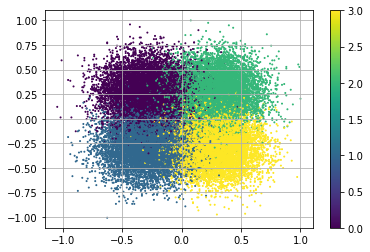

In [63]:
scatter(data[:,0]/max(data[:,0]),data[:,1]/max(data[:,1]),c=Map,s=1)
cgrid(True)
colorbar()

In [64]:
DataSet=zeros((len(data),2))
NormData(DataSet,data)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(DataSet, Map, test_size = 0.20)

In [66]:
#### Set the parameters by cross-validation
#tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
#                     'C': [1, 10, 100, 1000]},
#                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

tuned_parameters ={'C': stats.expon(scale=10), 'gamma': stats.expon(scale=.01),
                   'kernel': ['rbf'], 'class_weight':['balanced', None]}

scores = ['precision']#, 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = RandomizedSearchCV(SVC(), tuned_parameters, cv=4,
                       scoring='%s_macro' % score, n_jobs=-1, error_score=0)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'gamma': 0.00072222579113783076, 'C': 6.1136896327099777, 'class_weight': None, 'kernel': 'rbf'}

Grid scores on development set:

0.880 (+/-0.005) for {'gamma': 0.00015094852845642411, 'C': 9.7528262001273784, 'class_weight': 'balanced', 'kernel': 'rbf'}
0.880 (+/-0.005) for {'gamma': 0.01532974035086768, 'C': 10.307994577447577, 'class_weight': None, 'kernel': 'rbf'}
0.881 (+/-0.005) for {'gamma': 0.012564278945547229, 'C': 0.80508047688983142, 'class_weight': None, 'kernel': 'rbf'}
0.881 (+/-0.005) for {'gamma': 0.0023366626752279367, 'C': 1.2170128367469246, 'class_weight': None, 'kernel': 'rbf'}
0.881 (+/-0.005) for {'gamma': 0.00072222579113783076, 'C': 6.1136896327099777, 'class_weight': None, 'kernel': 'rbf'}
0.880 (+/-0.005) for {'gamma': 0.0060715670295681482, 'C': 27.981713775902506, 'class_weight': 'balanced', 'kernel': 'rbf'}
0.880 (+/-0.005) for {'gamma': 0.0045318491045025031, 'C': 0

In [67]:
x=clf.best_params_

In [68]:
svclassifier = SVC(kernel='rbf',C=x['C'],gamma= x['gamma'],class_weight= 'balanced')
svclassifier.fit(X_train, y_train)

SVC(C=6.1136896327099777, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.00072222579113783076,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [69]:
y_pred = svclassifier.predict(X_test)

In [70]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1397   97   87    6]
 [ 100 1446    6  108]
 [ 106    3 1474   91]
 [   2   78   95 1458]]
             precision    recall  f1-score   support

        0.0       0.87      0.88      0.88      1587
        1.0       0.89      0.87      0.88      1660
        2.0       0.89      0.88      0.88      1674
        3.0       0.88      0.89      0.88      1633

avg / total       0.88      0.88      0.88      6554



In [71]:
BER(y_test,y_pred)

0.11885871223680196